Data Source: <br>
[drivendata.org link](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/) [login required]

### Notebook 1: Data Cleaning, Exploration, and Preprocessing
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

50% of Tanzania's population do not have access to safe water. Among other sources, Tanzanians depend on water points mostly pumps (~60K) spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

**Features**

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

---

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

### import datasets

In [2]:
raw_data_folder_location = '../data/raw/'

# import features
independent_variables_df = pd.read_csv(f'{raw_data_folder_location}independent_variables.csv')

# import labels (target-variables) for features
dependent_variables_df = pd.read_csv(f'{raw_data_folder_location}dependent_variables.csv')

# merge features and it's labels (target variable)
df = pd.merge(independent_variables_df, dependent_variables_df)

df['date_recorded'] = pd.to_datetime(df['date_recorded'])

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


---

### lets look at the datatypes of the variables

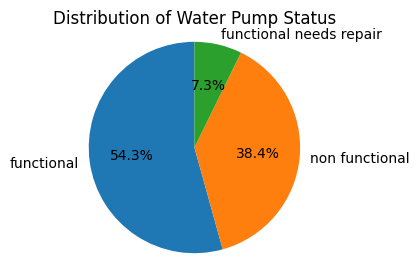

In [10]:
tgt_var_counts = df['status_group'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(tgt_var_counts.values, labels=tgt_var_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Water Pump Status')
plt.show()


**Observation:** <br>
- immbalanced distribution

---

Lets look at other variables (independent)

In [21]:
df.nunique().sort_values()

recorded_by                  1
public_meeting               2
permit                       2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
payment_type                 7
payment                      7
extraction_type_class        7
waterpoint_type              7
source_type                  7
water_quality                8
basin                        9
source                      10
scheme_management           11
management                  12
extraction_type_group       13
extraction_type             18
district_code               20
region                      21
region_code                 27
construction_year           55
num_private                 65
amount_tsh                  98
lga                        125
date_recorded              356
population                1049
funder                    1896
ward    

**Observation:**
- 

In [14]:
df.describe()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,2012-03-29 09:11:33.818181888,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
min,0.000000,0.000000,2002-10-14 00:00:00,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,2011-04-01 00:00:00,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,2012-10-10 00:00:00,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,2013-02-09 00:00:00,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2013-12-03 00:00:00,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000
std,21453.128371,2997.574558,NaN,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547


In [531]:
df.drop(columns='id', inplace = True)

---

# Missing Values

In [532]:
numerical_features = df.select_dtypes(include=[np.number]).columns
columns_with_zeros = df[numerical_features].apply(lambda col: (col == 0).sum())

# Display columns with a significant number of zeros
print(columns_with_zeros[columns_with_zeros > 0])

amount_tsh           41639
gps_height           20438
longitude             1812
num_private          58643
district_code           23
population           21381
construction_year    20709
dtype: int64


Observation:
- id : valid
- amount_tsh: represents waterpoints with no water available.
- gps_height: zero represents sea-level
- longitude: 0 places the location in the Atlantic Ocean, so definitely missing value
- num_private: data dictionary doesn't really say much
- district_code: geographic code
- population: either no people live near the pump, or it's missing value
- construction_year: definitely missing value

---

### amount_tsh

**Question:** <br>
What percentage of functional water pumps have no water i.e. amount_tsh = 0?

In [533]:
functional_zero_tsh = df[(df['status_group'] == 'functional') & (df['amount_tsh'] == 0)].shape[0]
print(f"Number of functional pumps with amount_tsh as zero: {functional_zero_tsh}")

Number of functional pumps with amount_tsh as zero: 19706


In [534]:
functional_pumps = len(df[df['status_group'] == 'functional'])

In [535]:
functional_zero_tsh/functional_pumps

0.6108682848197402

**Observation:** <br>
- ~61% of functional pumps have an 'amount_tsh' value of zero <br>
<br>

**Possibilities:** <br>
 - missing value
 - might be genuine, pump might be functional, but there might be no water

**Action:** <br>

**In the future:**
- We might do a segmentation analysis. For example, we can check if functional pumps with zero 'amount_tsh' are more common in certain regions, subvillages, or based on other categorical variables. This can provide insight into whether these zeros are valid or likely missing data.
<br>

**For now:**
- impute missing values with median

In [536]:
df['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [537]:
df['amount_tsh'].replace(0, np.nan, inplace=True)

median_tsh_functional = df[df['status_group'] == 'functional']['amount_tsh'].median()
median_tsh_non_functional = df[df['status_group'] == 'non functional']['amount_tsh'].median()
median_tsh_need_repair = df[df['status_group'] == 'functional needs repair']['amount_tsh'].median()

In [538]:
df.loc[(df['status_group'] == 'functional')\
              & (df['amount_tsh'].isna()), 'amount_tsh'] = median_tsh_functional
df.loc[(df['status_group'] == 'non functional')\
              & (df['amount_tsh'].isna()), 'amount_tsh'] = median_tsh_non_functional
df.loc[(df['status_group'] == 'functional needs repair')\
              & (df['amount_tsh'].isna()), 'amount_tsh'] = median_tsh_need_repair

### gps_height

**Observation:** <br>
- zero represents sea-level
- the highest point in Tanzania is 5895 m (19,341 ft)
- the lowest is floor of Lake Tanganyika, which goes down to 352 m (1,115 ft) below sea level at its deepest.
- the lakes surface is above sea level.
- zero could be valid
- but given the high proportion of zeros, it might also contain  missing data 
<br>

**Assumption:** <br>
- We will assume it to be missing data

**Action:** <br>

**In the future:**
- look more into it, someone with knowledge of Tanzania's topography might be instrumental

**For now:**
- impute missing values with median

In [539]:
df['gps_height'].replace(0, np.nan, inplace=True)
median_gps_height = df['gps_height'].median()
df['gps_height'].fillna(median_gps_height, inplace=True)


### longtitude

**Observation:**
- zero places the location in the Atlantic Ocean

**Action:** 
- impute missing values with median

In [540]:
df['longitude'].replace(0, np.nan, inplace=True)
median_longitude = df['longitude'].median()
df['longitude'].fillna(median_longitude, inplace=True)

### num_private

**Observation:** 
- data dictionary doesn't provide a clear definition. Challenging to determinne the exact meaning of this column

**Action:**
- Get a sense of unique values in this column besides zero to understand its distribution

In [541]:
unique_values = df['num_private'].value_counts()
print(unique_values)


num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64


**Observation:** <br>
- vast majority of values are zero, with few other values appearing sporadically
- data dictionary doesn't provide much information
<br>

**Action:** <br>
- drop the column

In [542]:
df.drop('num_private', axis=1, inplace=True)

### district_code

**Observation:**
- Given the data dictionary, district_code represents a coded geographic location
- Zeros most likely represents missing data 
<br>

**Action:**
- impute missing values with mode

In [543]:
df['district_code'].replace(0, np.nan, inplace=True)
mode_district_code = df['district_code'].mode()[0]
df['district_code'].fillna(mode_district_code, inplace=True)


### population

**Observation:** <br>
- either noone lives near the pump, or it is missing value
<br>

**Assumption:** <br>
- zeroes represent missing value 
<br>

**Action:**
- impute missing values with median

In [544]:
df['population'].replace(0, np.nan, inplace=True)
median_population = df['population'].median()
df['population'].fillna(median_population, inplace=True)

### contruction_year

**Observation:** <br>
- construction_year cannot be zero, so it is definitely a missing value
<br>

**Action:**
- impute missing values with median

In [545]:
df['construction_year'].replace(0, np.nan, inplace=True)
median_construction_year = df['construction_year'].median()
df['construction_year'].fillna(median_construction_year, inplace=True)

---

In [546]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data.sort_values(by='Percentage', ascending=False).head(10)


,Missing Values,Percentage
scheme_name,28810,48.501684
scheme_management,3878,6.528620
installer,3655,6.153199
funder,3637,6.122896
public_meeting,3334,5.612795
permit,3056,5.144781
subvillage,371,0.624579
wpt_name,2,0.003367
water_quality,0,0.000000
management,0,0.000000


**Observation:** <br>
- scheme_name: with > 48% data missing, imputing might introduce a lot of bias. Lets drop it
- scheme_management, installer, funder: ~ 6% data missing. We can impute with mode(most frequent value) or a placeholder like "unknown"
- public_meeting and permit: ~ 5% missing. Boolean features. Can treat missing value as third category "unknown"
- subvillage: ~ 0.62% missing. Impute mode or replace with "unknown"
- wpt_name: ~0.003% missing. Impute with mode or drop rows completely

In [547]:
df['scheme_name'].fillna('Unknown', inplace=True)

In [548]:
for column in ['scheme_management', 'installer', 'funder']:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)


In [549]:
for column in ['public_meeting', 'permit']:
    df[column].fillna('Unknown', inplace=True)

In [550]:
most_frequent_subvillage = df['subvillage'].mode()[0]
df['subvillage'].fillna(most_frequent_subvillage, inplace=True)


In [551]:
most_frequent_wpt_name = df['wpt_name'].mode()[0]
df['wpt_name'].fillna(most_frequent_wpt_name, inplace=True)


---

In [552]:
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


---

### Outlier Detection

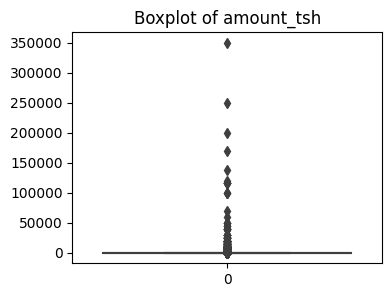

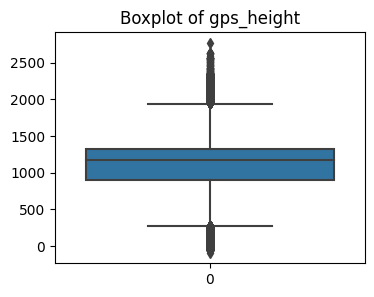

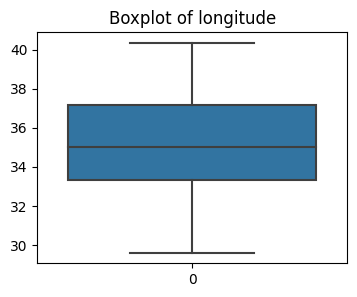

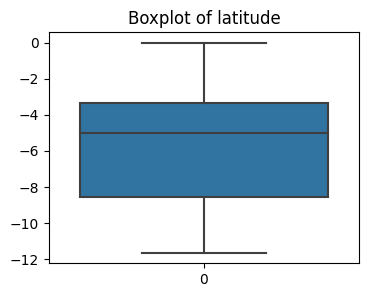

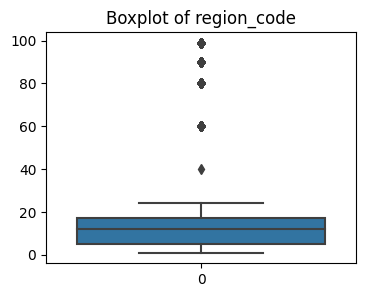

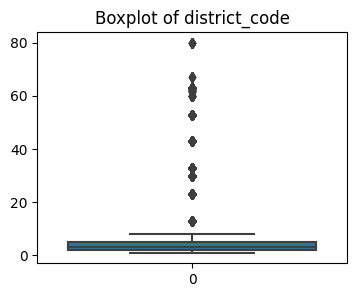

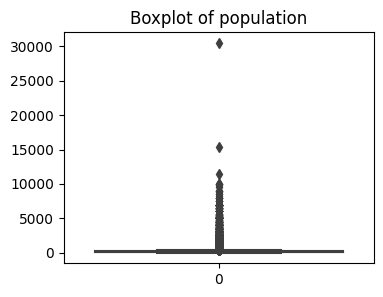

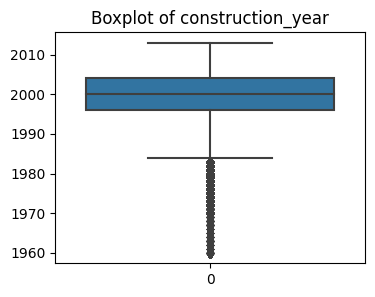

In [553]:
# Visualizing numerical features for outliers
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [554]:
# Exclude irrelevant columns
relevant_numerical_features = [feature for feature in numerical_features if feature not in ['id', 'district_code', 'region_code']]

outliers_dict = {}

for feature in relevant_numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_dict[feature] = len(outliers)

print(outliers_dict)


{'amount_tsh': 15392, 'gps_height': 8231, 'longitude': 0, 'latitude': 0, 'population': 7682, 'construction_year': 7225}


**Observation:** <br>
- amount_tsh has 11161 outliers
- gps_height has 8231 outliers
- population has 7682 outliers

**Action:**
- check the skewness
- if highly skewed, apply log transformation


In [555]:
# Check skewness of 'amount_tsh'
skewness = df['amount_tsh'].skew()
print(f"Skewness of amount_tsh: {skewness}")

Skewness of amount_tsh: 58.53515544615884


**Observation:**
- high positive skewness representing high skewness to the right, with a long tail on the right

**Action:**
- Apply log transformation

In [556]:
# Apply log transformation to 'amount_tsh'
df['amount_tsh_log'] = np.log(df['amount_tsh'])


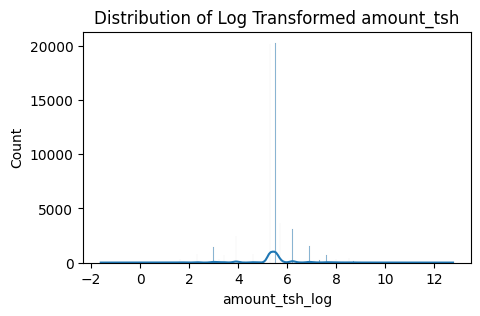

In [557]:
# Visualize the distribution of the transformed feature
plt.figure(figsize=(5, 3))
sns.histplot(df['amount_tsh_log'], kde=True)
plt.title('Distribution of Log Transformed amount_tsh')
plt.show()


In [558]:
df.drop(columns=['amount_tsh'], inplace=True)

### gps_height

In [559]:
# Check skewness of 'gps_height'
skewness_gps = df['gps_height'].skew()
print(f"Skewness of gps_height: {skewness_gps}")


Skewness of gps_height: -0.5393189981971919


**Observation:**
- low skewness, so there no strong need for transformation

**Action:**
- cap the extreme values by replacing them with a threshold value
- lets cap the upper outliers at 99th percentile value

In [560]:
# Define the upper bound threshold for capping
upper_threshold = df['gps_height'].quantile(0.99)

# Cap upper outliers
df['gps_height_capped'] = df['gps_height'].apply(lambda x: upper_threshold if x > upper_threshold else x)

### population

In [561]:
# Check skewness of 'population'
skewness = df['population'].skew()
print(f"Skewness of population: {skewness}")

Skewness of population: 13.648134703114286


In [562]:
# Apply log transformation to 'population'
df['population_log'] = np.log(df['population'])


Export modifed dataset

In [565]:
# Specify the file path where you want to save the DataFrame
file_path = '../data/processed/modified_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)